## Missing value using Mean.

In [105]:
import pandas as pd
data = pd.read_csv('oasis_cross-sectional.csv')

In [106]:
data.head(10)
# Mini Mental State Examination - MMSE
# Socioeconomic Status - SES
# Clinical Dementia Rating - CDR
# Estimated Total Intracranial Volume - eTIV
# Normalize Whole Brain Volume - nWBV
# Atlas Scaling Factor - ASF

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


In [107]:
# Total missing value for each column
data.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [108]:
# % of missing values
data.isnull().mean()

ID       0.000000
M/F      0.000000
Hand     0.000000
Age      0.000000
Educ     0.461009
SES      0.504587
MMSE     0.461009
CDR      0.461009
eTIV     0.000000
nWBV     0.000000
ASF      0.000000
Delay    0.954128
dtype: float64

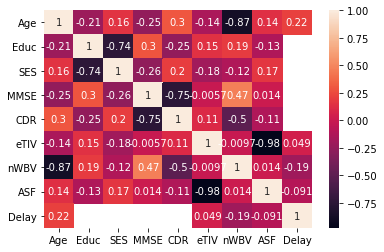

In [109]:
# correlation 
import seaborn as sns


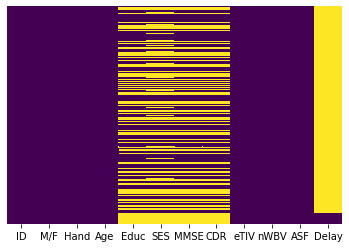

In [110]:
# Visualising null value using seaborn library
sns.heatmap(data.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [111]:
# dropping delay column since 95% missing and has no relation on scanning delay with dementia 
data = data.drop(columns=['Delay'])
data.head(5)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


In [112]:
data['CDR'].value_counts()

0.0    135
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64

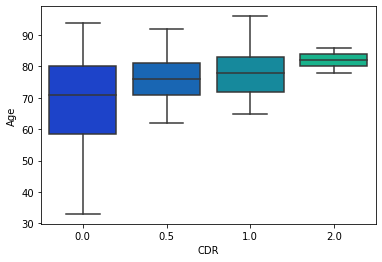

In [113]:
sns.boxplot(x='CDR', y='Age', data=data, palette='winter')

In [114]:
def impute_CDR(cols):
    age = cols[0]
    cdr = cols[1]
    
    if(pd.isnull(cdr)):
        if(age in range(0,30)):
            return 0.0
        if(age in range(30,50)):
            return 0.5
        if(age in range(50,70)):
            return 1.0
        if(age in range(70,90)):
            return 2.0
    else:
        return cdr

In [115]:
data['CDR_null'] = data[['Age','CDR']].apply(impute_CDR, axis=1)

In [116]:
data.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,CDR_null
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0.0
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0.0
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,0.5
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,0.0
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,0.0
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,0.0
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,0.0
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,0.0
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0.0
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,0.0


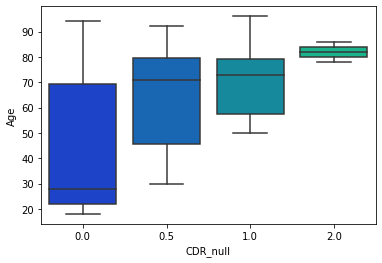

In [117]:
sns.boxplot(x='CDR_null', y='Age', data=data, palette='winter')

In [118]:
print(data['CDR'].std())
print(data['CDR_null'].std())

0.38340507879560354
0.34663497389178843


In [119]:
data['CDR_mean'] = data['CDR']
data['CDR_mean'] = data['CDR_mean'].fillna((data['CDR_mean'].mean()))


In [120]:
print(data.head(10))
print(data['CDR'].std())
print(data['CDR_mean'].std())

              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
5  OAS1_0006_MR1   F    R   24   NaN  NaN   NaN  NaN  1131  0.862  1.551   
6  OAS1_0007_MR1   M    R   21   NaN  NaN   NaN  NaN  1516  0.830  1.157   
7  OAS1_0009_MR1   F    R   20   NaN  NaN   NaN  NaN  1505  0.843  1.166   
8  OAS1_0010_MR1   M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073   
9  OAS1_0011_MR1   F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329   

   CDR_null  CDR_mean  
0       0.0  0.000000  
1       0.0  0.000000  
2       0.5  0.500000  
3       0.0  0.285106  
4       0.0  0.285106  
5       0.0  0.2851

In [121]:
def impute_CDR_median(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [122]:
median = data.CDR.median()
median

0.0

In [123]:
impute_nan(data,'CDR',median)
data.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,CDR_null,CDR_mean,CDR_median
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0.0,0.000000,0.0
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0.0,0.000000,0.0
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,0.5,0.500000,0.5
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,0.0,0.285106,0.0
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,0.0,0.285106,0.0
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,0.0,0.285106,0.0
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,0.0,0.285106,0.0
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,0.0,0.285106,0.0
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0.0,0.000000,0.0
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,0.0,0.000000,0.0


In [124]:
print(data['CDR'].std())
print(data['CDR_median'].std())

0.38340507879560354
0.3151504965807559


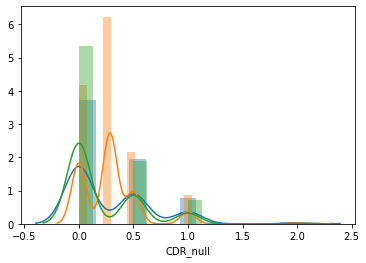

In [125]:
sns.distplot(data['CDR'])
sns.distplot(data['CDR_mean'])
sns.distplot(data['CDR_null'])

In [126]:
# standard deviation difference is least for CDR_null column imputed with custom function
data['CDR']=data['CDR_null']

In [127]:
data.isnull().sum()

ID              0
M/F             0
Hand            0
Age             0
Educ          201
SES           220
MMSE          201
CDR             0
eTIV            0
nWBV            0
ASF             0
CDR_null        0
CDR_mean        0
CDR_median      0
dtype: int64

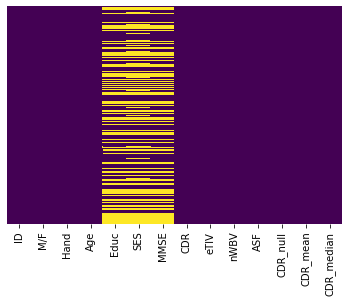

In [128]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False, cmap='viridis')